In [1]:
import matplotlib.pyplot as plt
import aplpy
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
from astropy.wcs import WCS
from astropy.utils.data import get_pkg_data_filename
import math as m
import scipy.optimize as opt

In [2]:
hill_data = fits.getdata('fits_files/VelaC_500_hill_regs_regrid_30as_pix.fits', ext = 0)
var_Q_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_Q.fits', ext = 0)
var_U_data = fits.getdata('fits_files/VelaC_500_intermediate_regrid_30as_pix_var_U.fits', ext = 0)
ang_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_ang.fits', ext=0)
I_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_I.fits', ext=0)
p_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_p.fits', ext=0)
polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_polint.fits', ext = 0)
Q_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_Q.fits', ext=0)
S_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_S.fits', ext = 0)
s2n_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_s2n_polint.fits', ext = 0)
U_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_U.fits', ext = 0)
var_polint_data = fits.getdata('fits_files_2/VelaC_500_intermediate_regrid_30as_pix_var_polint.fits', ext=0)

In [3]:
#mask0 = np.logical_and(hill_data==0, polint_data>3*np.sqrt(var_polint_data))
#mask1 = np.logical_and(hill_data==1, polint_data>3*np.sqrt(var_polint_data))
mask2 = np.logical_and(hill_data==2, polint_data>3*np.sqrt(var_polint_data))
mask3 = np.logical_and(hill_data==3, polint_data>3*np.sqrt(var_polint_data))
mask4 = np.logical_and(hill_data==4, polint_data>3*np.sqrt(var_polint_data))
mask5 = np.logical_and(hill_data==5, polint_data>3*np.sqrt(var_polint_data))


#i_good0 = mask0.nonzero()
#i_good1 = mask1.nonzero()
i_good2 = mask2.nonzero()
i_good3 = mask3.nonzero()
i_good4 = mask4.nonzero()
i_good5 = mask5.nonzero()

#p_good0 = p_data[i_good0]
#p_good1 = p_data[i_good1]
p_good2 = p_data[i_good2]
p_good3 = p_data[i_good3]
p_good4 = p_data[i_good4]
p_good5 = p_data[i_good5]

p_max = 0.15
p_0 = (3*p_max)/(3+p_max)

#gamma0 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good0]
#gamma1 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good1]
gamma2 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good2]
gamma3 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good3]
gamma4 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good4]
gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]

<ipython-input-3-d468c4f6ff3f>:31: RuntimeWarning: invalid value encountered in arccos
  gamma5 = [(1/2)*np.arccos(((2*p_obs*(1+(2/3)*p_0))/(p_0*(1+p_obs)))-1)*180/np.pi for p_obs in p_good5]


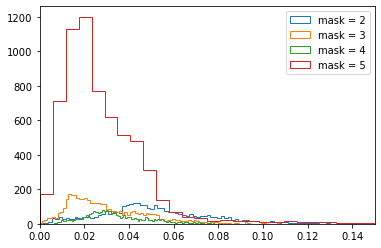

In [4]:
#pfrac0, bins, patches = plt.hist(p_good0, 100, histtype = 'step', label = 'mask = 0')
#pfrac1, bins, patches = plt.hist(p_good1, 90, histtype = 'step', label = 'mask = 1')
pfrac2, bins, patches = plt.hist(p_good2, 90, histtype = 'step', label = 'mask = 2')
pfrac3, bins, patches = plt.hist(p_good3, 90, histtype = 'step', label = 'mask = 3')
pfrac4, bins, patches = plt.hist(p_good4, 90, histtype = 'step', label = 'mask = 4')
pfrac5, bins, patches = plt.hist(p_good5, 90, histtype = 'step', label = 'mask = 5')
plt.xlim(0,   0.15)
plt.legend()

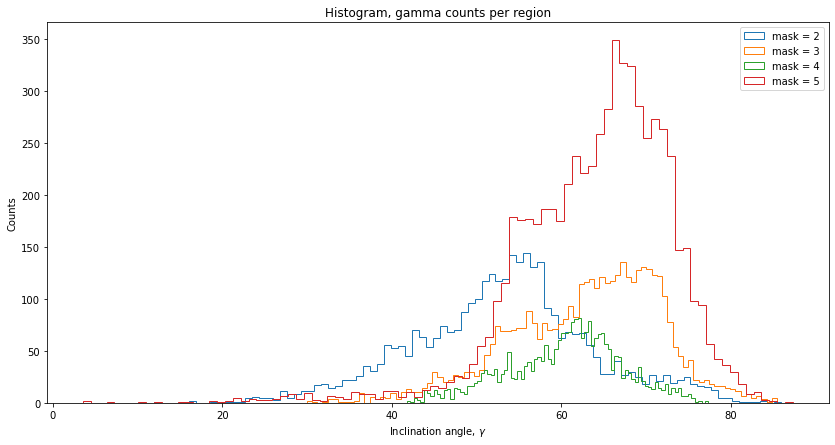

In [12]:
plt.figure(figsize = (14, 7))
#hist0, bins, patches = plt.hist(gamma0, 90, histtype = 'step', label = 'mask = 0')
#hist1, bins, patches = plt.hist(gamma1, 90, histtype = 'step', label = 'mask = 1')
hist2, bins, patches = plt.hist(gamma2, 90, histtype = 'step', label = 'mask = 2')
hist3, bins, patches = plt.hist(gamma3, 90, histtype = 'step', label = 'mask = 3')
hist4, bins, patches = plt.hist(gamma4, 90, histtype = 'step', label = 'mask = 4')
hist5, bins, patches = plt.hist(gamma5, 90, histtype = 'step', label = 'mask = 5')

plt.title('Histogram, gamma counts per region')
plt.xlabel('Inclination angle, $\gamma$')
plt.ylabel('Counts')
plt.legend()
plt.savefig('Vela_C_histogram_all')


In [6]:
#gauss0 = np.zeros(len(bins)-1)                 #array of zeroes for bincenter
#gauss1 = np.zeros(len(bins)-1)             #array of zeroes for bincenter
gauss2 = np.zeros(len(bins)-1)             #array of zeroes for bincenter
gauss3 = np.zeros(len(bins)-1)             #array of zeroes for bincenter
gauss4 = np.zeros(len(bins)-1)             #array of zeroes for bincenter
gauss5 = np.zeros(len(bins)-1)             #array of zeroes for bincenter

for m in range(len(bins)-1):                  #Loops through all the bins and sets a value for each center on the x axis
    #gauss0[m] = (0.5*(bins[m]+bins[m+1]))
    #gauss1[m] = (0.5*(bins[m]+bins[m+1]))
    gauss2[m] = (0.5*(bins[m]+bins[m+1]))
    gauss3[m] = (0.5*(bins[m]+bins[m+1]))
    gauss4[m] = (0.5*(bins[m]+bins[m+1]))
    gauss5[m] = (0.5*(bins[m]+bins[m+1]))

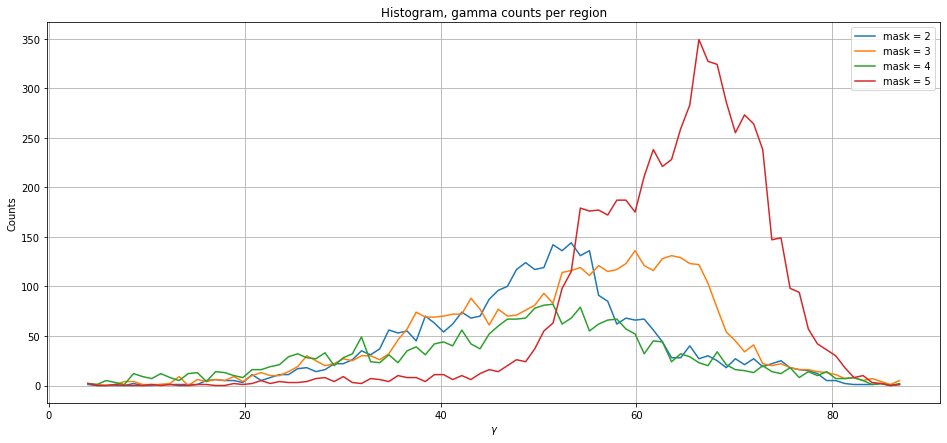

In [7]:
plt.figure(figsize = (16, 7))
#plt.plot(gauss0, hist0, label = 'mask = 0')
#plt.plot(gauss1, hist1, label = 'mask = 1')
plt.plot(gauss2, hist2, label = 'mask = 2')
plt.plot(gauss3, hist3, label = 'mask = 3')
plt.plot(gauss4, hist4, label = 'mask = 4')
plt.plot(gauss5, hist5, label = 'mask = 5')

plt.title('Histogram, gamma counts per region')
plt.xlabel('$\gamma$')
plt.ylabel('Counts')
plt.legend()
plt.grid()

array([116.17504032,  50.37630298,  10.26304943])

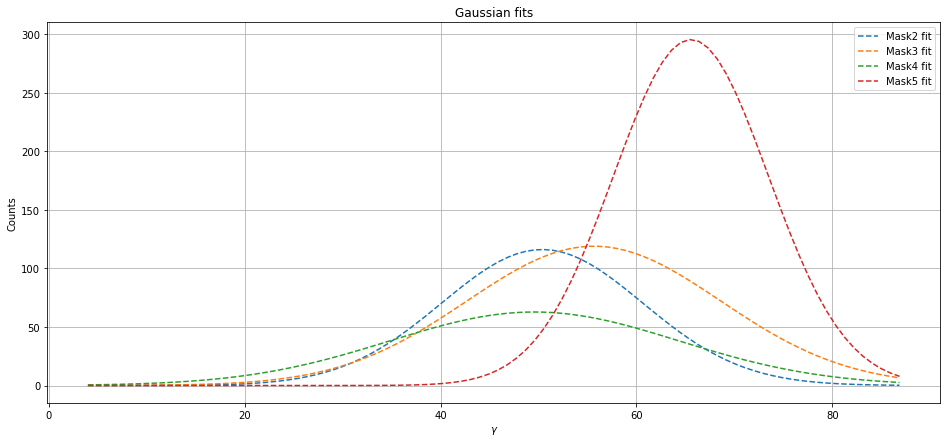

In [8]:
plt.figure(figsize = (16, 7))

def gaussian(x, *p):                                                #defining gaussian function for fit
        return p[0]*np.exp(-1*(x-p[1])**2/(2*p[2]**2))     

#gPar0,gCov0 = opt.curve_fit(gaussian,gauss0, hist0,p0=(1, 1, 1))  #fitting parameters
#gPar1,gCov1 = opt.curve_fit(gaussian,gauss1, hist1,p0=(1, 60, 1)) 
gPar2,gCov2 = opt.curve_fit(gaussian,gauss2, hist2,p0=(150, 50, 10)) 
gPar3,gCov3 = opt.curve_fit(gaussian,gauss3, hist3,p0=(150, 60, 10)) 
gPar4,gCov4 = opt.curve_fit(gaussian,gauss4, hist4,p0=(75, 50, 10)) 
gPar5,gCov5 = opt.curve_fit(gaussian,gauss5, hist5,p0=(350, 68, 10)) 


#gaussfit0 = gaussian(gauss0, gPar0[0], gPar0[1], gPar0[2])
#gaussfit1 = gaussian(gauss1, gPar1[0], gPar1[1], gPar1[2])
gaussfit2 = gaussian(gauss2, gPar2[0], gPar2[1], gPar2[2])
gaussfit3 = gaussian(gauss3, gPar3[0], gPar3[1], gPar3[2])
gaussfit4 = gaussian(gauss4, gPar4[0], gPar4[1], gPar4[2])
gaussfit5 = gaussian(gauss5, gPar5[0], gPar5[1], gPar5[2])

#plt.plot(gauss0, gaussfit0, '--', label = 'Mask0 fit')
#plt.plot(gauss1, gaussfit1, '--', label = 'Mask1 fit')
plt.plot(gauss2, gaussfit2, '--', label = 'Mask2 fit')
plt.plot(gauss3, gaussfit3, '--', label = 'Mask3 fit')
plt.plot(gauss4, gaussfit4, '--', label = 'Mask4 fit')
plt.plot(gauss5, gaussfit5, '--', label = 'Mask5 fit')

plt.title('Gaussian fits')
plt.xlabel('$\gamma$')
plt.ylabel('Counts')
plt.legend()
plt.grid()
gPar2

In [9]:
# S histograms
# gamma histograms for S<S_median
y1 = np.linspace(0,145)
x1 = [50.37630298]*len(y1)
y2 = np.linspace(0,145)
x2 = [55.64221611]*len(y2)
y3 = np.linspace(0,100)
x3 = [49.57956981]*len(y3)
y4 = np.linspace(0,360)
x4 = [65.55498876]*len(y4)

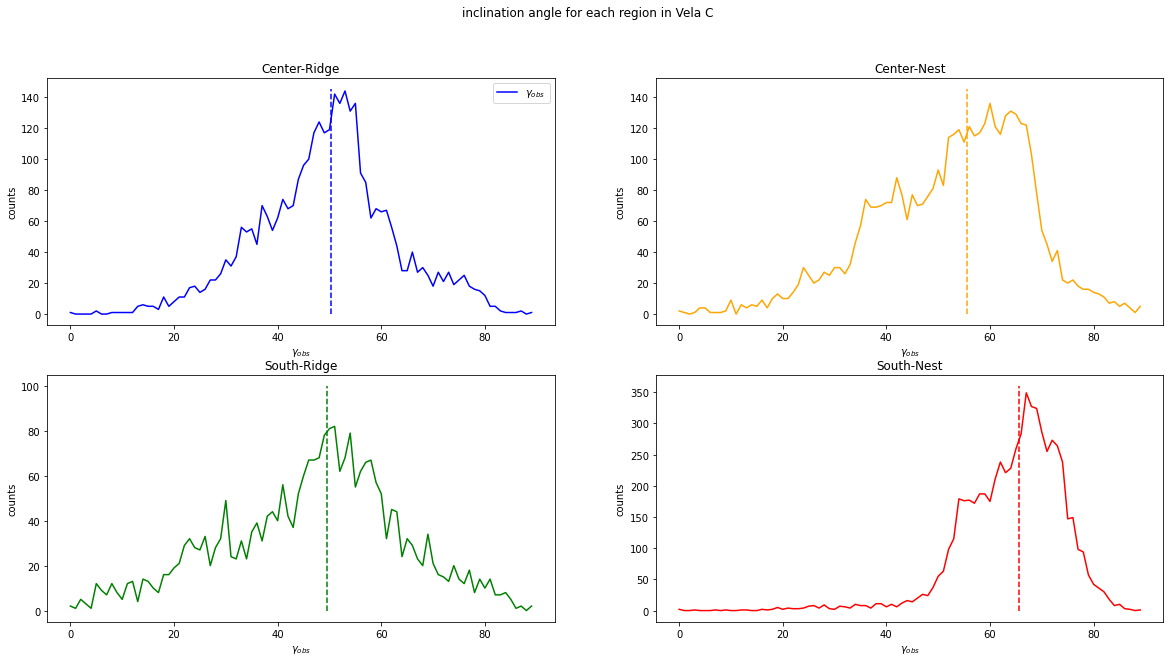

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (20, 10))
axs[0, 0].plot(hist2, color = 'blue', label = '$\gamma_{obs}$')
axs[0, 0].plot(x1, y1, '--', color = 'blue')
axs[0, 0].set_title('Center-Ridge')
axs[0, 0].legend()

axs[0, 1].plot(x2, y2, '--', color = 'orange')
axs[0, 1].plot(hist3, color = 'orange')
axs[0, 1].set_title('Center-Nest')
axs[1, 0].plot(x3, y3, '--', color = 'green')
axs[1, 0].plot(hist4, color = 'green')
axs[1, 0].set_title('South-Ridge')
axs[1, 1].plot(x4, y4, '--', color = 'red')
axs[1, 1].plot(hist5, color = 'red')
axs[1, 1].set_title('South-Nest')
fig.suptitle('inclination angle for each region in Vela C')


for ax in axs.flat:
    ax.set(xlabel='$\gamma_{obs}$', ylabel='counts')
    
plt.savefig('Vela_C_4_gammap')